<a href="https://colab.research.google.com/github/sanchezis/08MBID-Visualizacion-de-Datos/blob/main/08MBID_TP_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08MIBD - Trabajo Práctico
Máster en Big Data y Ciencia de Datos

Alumno: Israel Sánchez Llorens.<br/>

[StackBlitz Website](https://israelllorens.stackblitz.io)<br/>
[Github Repository]()<br/>
[Google Colab](https://github.com/sanchezis/08MBID-Visualizacion-de-Datos)<br/>


## Carga de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import requests

import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json
import requests
import geopandas as gpd
from datetime import datetime

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

IN_COLAB=False
try:
  from google.colab import files
  IN_COLAB=True
except:
  pass

def read_url_csv(url):
  from io import StringIO
  response = requests.get(url, verify=False)
  return pd.read_csv(StringIO(response.text))


# Function to convert yyyyww format to datetime
def convert_to_datetime(date_as_integer):
    date_str = str(date_as_integer)
    year = int(date_str[:4])
    week = int(date_str[4:])
    return datetime.strptime(f'{year}-{week}-1', '%G-%V-%u')


In [3]:
clinical_health = read_url_csv("https://raw.githubusercontent.com/sanchezis/08MBID-Visualizacion-de-Datos/main/data/clinical-sentinel-laboratory-influenza-and-other-respiratory-virus-surveillance-data-by-region-and-influenza-season.csv")
public_health = read_url_csv("https://raw.githubusercontent.com/sanchezis/08MBID-Visualizacion-de-Datos/main/data/public-health-laboratory-influenza-respiratory-virus-surveillance-data-by-region-and-influenza-season.csv")
insurance = read_url_csv("https://raw.githubusercontent.com/sanchezis/08MBID-Visualizacion-de-Datos/main/data/insurance.csv")

public_health = public_health.rename(columns={'Influenza_Category': 'Respiratory_Virus',
                             'Count': 'Number_Positive'})
clinical_health = clinical_health.drop('Percent_Positive', axis=1).drop('Specimens_Tested', axis=1)

# Apply the function to the DataFrame column
clinical_health['date_code'] = clinical_health['date_code'].apply(convert_to_datetime)
public_health['date_code'] = public_health['date_code'].apply(convert_to_datetime)

# Apply the function to the DataFrame column
clinical_health['weekending'] = pd.to_datetime(clinical_health['weekending'])
public_health['weekending'] = pd.to_datetime(public_health['weekending'])

clinical_health = clinical_health[~clinical_health.Respiratory_Virus.str.lower().str.contains('total')]
public_health = public_health[~public_health.Respiratory_Virus.str.lower().str.contains('total')]

clinical_health = clinical_health[~clinical_health.Respiratory_Virus.str.lower().str.contains('tested')]
public_health = public_health[~public_health.Respiratory_Virus.str.lower().str.contains('tested')]

public_health = public_health[~ (public_health.Respiratory_Virus == 'Influenza_A') ]

clinical_health = clinical_health[~clinical_health.region.str.lower().str.contains('california')]
public_health = public_health[~public_health.region.str.lower().str.contains('california')]

clinical_health = clinical_health[~clinical_health.region.str.lower().str.contains('california')]
public_health = public_health[~public_health.region.str.lower().str.contains('california')]

clinical_health.loc[clinical_health.region.str.lower().str.contains('northern'), 'region'] = 'Northern'
public_health.loc[public_health.region.str.lower().str.contains('northern'), 'region'] = 'Northern'

clinical_health.loc[clinical_health.region.str.lower().str.contains('southern'), 'region'] = 'Southern'
public_health.loc[public_health.region.str.lower().str.contains('southern'), 'region'] = 'Southern'

clinical_health['year'] = clinical_health.date_code.dt.year
clinical_health['month'] = clinical_health.date_code.dt.month
public_health['year'] = public_health.date_code.dt.year
public_health['month'] = public_health.date_code.dt.month
clinical_health = clinical_health[clinical_health.year>2009]
public_health = public_health[public_health.year>2009]


clinical_health = clinical_health.groupby(['season',	'date_code',	'weekending',	'region', 'Respiratory_Virus', 'year', 'month' ]).agg({'Number_Positive':'sum'}).reset_index()
public_health   = public_health  .groupby(['season',	'date_code',	'weekending',	'region', 'Respiratory_Virus', 'year', 'month' ]).agg({'Number_Positive':'sum'}).reset_index()


In [7]:
clinical_health.to_csv("./data/clinical_health.csv")
public_health.to_csv("./data/public_health.csv")

## EDA

In [4]:
clinical_health.columns

Index(['season', 'date_code', 'weekending', 'region', 'Respiratory_Virus',
       'year', 'month', 'Number_Positive'],
      dtype='object')

In [5]:
clinical_health.region.value_counts()

Bay Area    5900
Central     5900
Northern    5900
Southern    5900
Name: region, dtype: int64



Values:

Bay Area:  Includes Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano, and Sonoma counties

Central: Includes Calaveras, Fresno, Inyo, Kings, Madera, Mariposa, Merced, Mono, Monterey, San Benito, San Joaquin, Stanislaus, Tulare, and Tuolumne counties

Northern: Includes Alpine, Amador, Butte, Colusa, Del Norte, El Dorado, Glenn, Humboldt, Lake, Lassen, Mendocino, Modoc, Nevada, Placer, Plumas, Sacramento,
          Shasta, Sierra, Siskiyou, Sutter, Tehama, Trinity, Yolo, and Yuba counties

Upper Southern: Includes Kern, Los Angeles, San Luis Obispo, Santa Barbara, and Ventura counties
Lower Southern: Includes Imperial, Orange, Riverside, San Bernardino, and San Diego counties

Upper/Lower Southern: Includes data from a regional laboratory covering counties included in the Upper Southern
              and Lower Southern regions that could not be assigned to a more specific region.

Note: Not all counties in region have clinical sentinel laboratories.


In [ ]:
# [['season',	'date_code',	'weekending',	'region','Number_Positive']]\

In [ ]:
clinical_health\
    .sort_values(['season',	'date_code',	'weekending',	'region']).head(8*5)

,season,date_code,weekending,region,Respiratory_Virus,year,month,Number_Positive
0,2009-2010,2010-01-04,2010-01-09,Bay Area,Influenza_A,2010,1,30
1,2009-2010,2010-01-04,2010-01-09,Bay Area,Influenza_B,2010,1,0
2,2009-2010,2010-01-04,2010-01-09,Bay Area,RSV,2010,1,97
3,2009-2010,2010-01-04,2010-01-09,Central,Influenza_A,2010,1,8
4,2009-2010,2010-01-04,2010-01-09,Central,Influenza_B,2010,1,0
5,2009-2010,2010-01-04,2010-01-09,Central,RSV,2010,1,48
6,2009-2010,2010-01-04,2010-01-09,Northern,Influenza_A,2010,1,4
7,2009-2010,2010-01-04,2010-01-09,Northern,Influenza_B,2010,1,0
8,2009-2010,2010-01-04,2010-01-09,Northern,RSV,2010,1,13
9,2009-2010,2010-01-04,2010-01-09,Southern,Influenza_A,2010,1,8


In [ ]:
public_health.head(200)

,season,date_code,weekending,region,Respiratory_Virus,Number_Positive
1,2009-2010,2009-09-28,2009-10-04,Bay Area,Influenza_AH3,0
2,2009-2010,2009-09-28,2009-10-04,Bay Area,Influenza_AH1,0
3,2009-2010,2009-09-28,2009-10-04,Bay Area,Influenza_AH1pdm09,0
4,2009-2010,2009-09-28,2009-10-04,Bay Area,Influenza_ANotSubtyped,56
5,2009-2010,2009-09-28,2009-10-04,Bay Area,Influenza_B,0
17,2009-2010,2009-09-28,2009-10-04,Central,Influenza_AH3,0
18,2009-2010,2009-09-28,2009-10-04,Central,Influenza_AH1,0
19,2009-2010,2009-09-28,2009-10-04,Central,Influenza_AH1pdm09,0
20,2009-2010,2009-09-28,2009-10-04,Central,Influenza_ANotSubtyped,192
21,2009-2010,2009-09-28,2009-10-04,Central,Influenza_B,1


<Axes: xlabel='year', ylabel='Number_Positive'>

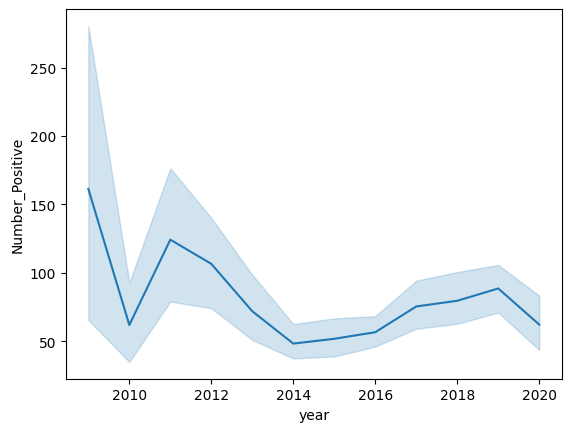

In [ ]:
sns.lineplot(x='year', y='Number_Positive', data= clinical_health.groupby(['year', 'month', 'region', 'Respiratory_Virus']).agg({'Number_Positive': 'sum'}) )

In [ ]:
public_health.region.value_counts().index

Index(['Bay Area', 'California', 'Central', 'Lower Southern', 'Northern',
       'Upper Southern'],
      dtype='object')

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
